Тема 33: Інтелектуальна інформаційна система для класифікування токсичних коментарів
Набір даних: Toxic Comment Classification Challenge (https://www.kaggle.com/competitions/jigsaw-toxic-comment-classification-challenge/data) - Потрібен акаунт Kaggle для доступу до train.csv, test.csv, test_labels.csv, sample_submission.csv.

Мета: Класифікувати онлайн-коментарі за кількома категоріями токсичності (toxic, severe_toxic, obscene, threat, insult, identity_hate). Оскільки один коментар може належати до кількох категорій одночасно, це завдання є багатозначною класифікацією тексту (Multi-label Text Classification).

Завдання 1. Завантаження та Попереднє Оброблення Текстових Даних:
1.1. Завантаження даних: Завантажте train.csv, test.csv, test_labels.csv. Файл test_labels.csv містить мітки для тестового набору (деякі мають значення -1, що означає, що вони не використовувалися для оцінки у змаганні, але можуть бути корисні для аналізу).


Train shape: (159571, 8)
Test shape: (153164, 2)
Test labels shape: (153164, 7)

Перші 3 записи train.csv:
                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  

Кількість прикладів у кожній категорії:
toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


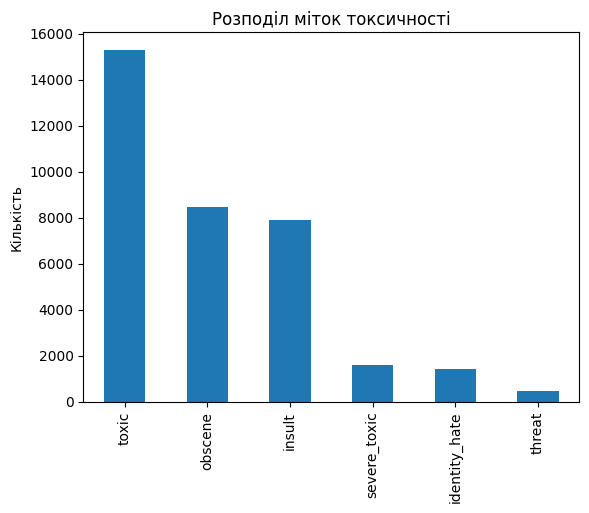


Приклад очищеного тексту:
                                        comment_text  \
0  Explanation\nWhy the edits made under my usern...   
1  D'aww! He matches this background colour I'm s...   

                                       clean_comment  
0  explanation why the edits made under my userna...  
1  d'aww he matches this background colour i'm se...  


In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
test_labels_df = pd.read_csv('test_labels.csv')
sample_submission_df = pd.read_csv('sample_submission.csv')

# Перевірка розмірностей
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("Test labels shape:", test_labels_df.shape)

# Перевірка вмісту даних
print("\nПерші 3 записи train.csv:")
print(train_df.head(3))

# Категорії токсичності та їх розподіл
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

print("\nКількість прикладів у кожній категорії:")
print(train_df[categories].sum())

# Візуалізація розподілу
train_df[categories].sum().sort_values(ascending=False).plot(kind='bar', title='Розподіл міток токсичності')
plt.ylabel('Кількість')
plt.show()

# Очищення тексту
def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", "", text)  # видалення HTML-тегів
    text = re.sub(r"[^a-zA-Z']", " ", text)  # тільки англійські літери
    text = re.sub(r"\s+", " ", text).strip()  # зайві пробіли
    return text

train_df['clean_comment'] = train_df['comment_text'].apply(clean_text)
test_df['clean_comment'] = test_df['comment_text'].apply(clean_text)

#  Результат очищення
print("\nПриклад очищеного тексту:")
print(train_df[['comment_text', 'clean_comment']].head(2))

1.2. Аналіз даних:
Огляньте структуру train.csv (id, comment_text, та 6 бінарних стовпців-міток).
Проаналізуйте розподіл кожної мітки токсичності (скільки коментарів належать до кожного класу). Зверніть увагу на дисбаланс.
Дослідіть кореляції між мітками токсичності (наприклад, 'toxic' та 'severe_toxic' часто зустрічаються разом).

Стовпці в train.csv: ['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'clean_comment']

Приклад запису:
                                                               0
id                                              0000997932d777bf
comment_text   Explanation\nWhy the edits made under my usern...
toxic                                                          0
severe_toxic                                                   0
obscene                                                        0
threat                                                         0
insult                                                         0
identity_hate                                                  0
clean_comment  explanation why the edits made under my userna...

Кількість коментарів у кожній категорії токсичності:
toxic            15294
obscene           8449
insult            7877
severe_toxic      1595
identity_hate     1405
threat             478
dtype: 

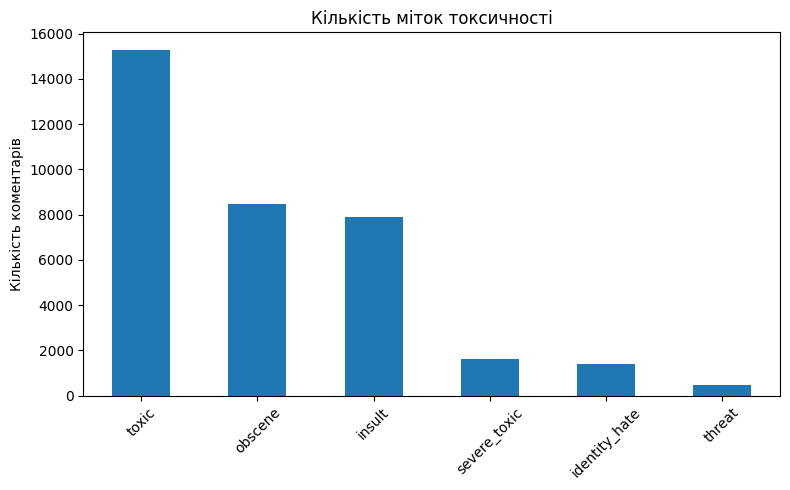


Розподіл за кількістю токсичних категорій в одному коментарі:
labels_sum
0    143346
1      6360
2      3480
3      4209
4      1760
5       385
6        31
Name: count, dtype: int64


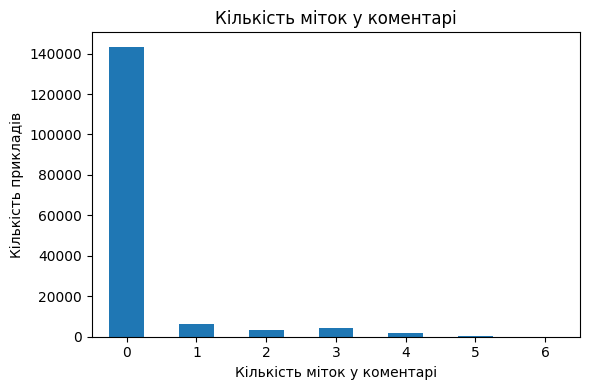


Кореляція між мітками токсичності:
                  toxic  severe_toxic   obscene    threat    insult  \
toxic          1.000000      0.308619  0.676515  0.157058  0.647518   
severe_toxic   0.308619      1.000000  0.403014  0.123601  0.375807   
obscene        0.676515      0.403014  1.000000  0.141179  0.741272   
threat         0.157058      0.123601  0.141179  1.000000  0.150022   
insult         0.647518      0.375807  0.741272  0.150022  1.000000   
identity_hate  0.266009      0.201600  0.286867  0.115128  0.337736   

               identity_hate  
toxic               0.266009  
severe_toxic        0.201600  
obscene             0.286867  
threat              0.115128  
insult              0.337736  
identity_hate       1.000000  


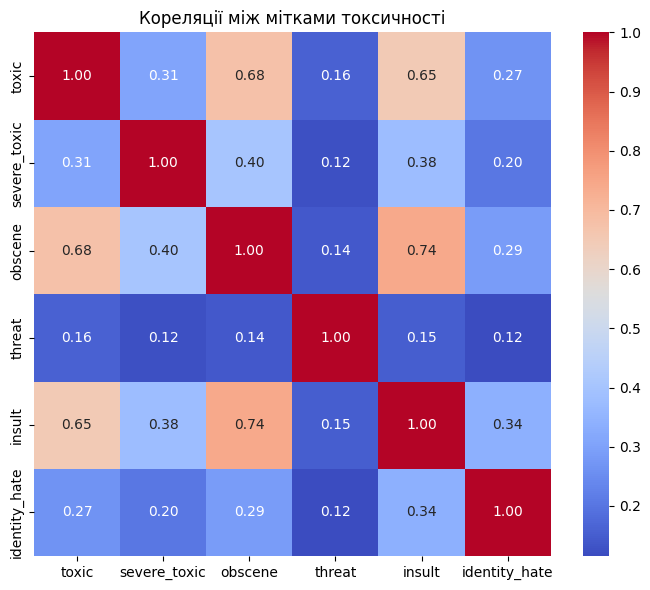

In [2]:


# Перегляд структури даних
print("Стовпці в train.csv:", train_df.columns.tolist())
print("\nПриклад запису:")
print(train_df.head(1).T)

# Список міток токсичності
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Розподіл по класах
label_counts = train_df[categories].sum().sort_values(ascending=False)
print("\nКількість коментарів у кожній категорії токсичності:")
print(label_counts)

# Побудова гістограми
plt.figure(figsize=(8, 5))
label_counts.plot(kind='bar', title='Кількість міток токсичності')
plt.ylabel("Кількість коментарів")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Перевірка мульти-мітковості (скільки міток одночасно)
train_df['labels_sum'] = train_df[categories].sum(axis=1)
multi_label_counts = train_df['labels_sum'].value_counts().sort_index()

print("\nРозподіл за кількістю токсичних категорій в одному коментарі:")
print(multi_label_counts)

plt.figure(figsize=(6,4))
multi_label_counts.plot(kind='bar', title='Кількість міток у коментарі')
plt.xlabel("Кількість міток у коментарі")
plt.ylabel("Кількість прикладів")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Кореляція між мітками
correlation_matrix = train_df[categories].corr()

print("\nКореляція між мітками токсичності:")
print(correlation_matrix)

# Візуалізація кореляційної матриці
plt.figure(figsize=(7, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Кореляції між мітками токсичності")
plt.tight_layout()
plt.show()


1.3. Попереднє Оброблення тексту ('comment_text'): Створіть функцію очищення тексту:
Приведення до нижнього регістру.
Видалення IP-адрес, URL-адрес, імен користувачів (якщо є).
Видалення спеціальних символів, пунктуації, можливо, чисел.
Токенізація.
Видалення стоп-слів.
Стемінг/Лематизація (опціонально, може допомогти).
Застосуйте функцію до train.csv та test.csv.

In [3]:
import nltk
nltk.data.path.clear()

nltk.data.path.append('D:/ІАД_Курсовий_Проєкт/nltk_data')
nltk.download('punkt', download_dir='D:/ІАД_Курсовий_Проєкт/nltk_data')
nltk.download('stopwords', download_dir='D:/ІАД_Курсовий_Проєкт/nltk_data')
nltk.download('wordnet', download_dir='D:/ІАД_Курсовий_Проєкт/nltk_data')
nltk.download('punkt_tab', download_dir='D:/ІАД_Курсовий_Проєкт/nltk_data')


[nltk_data] Downloading package punkt to
[nltk_data]     D:/ІАД_Курсовий_Проєкт/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     D:/ІАД_Курсовий_Проєкт/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     D:/ІАД_Курсовий_Проєкт/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     D:/ІАД_Курсовий_Проєкт/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Список англійських стоп-слів
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Функція очищення коментаря
def preprocess_text(text):
    text = text.lower()  # до нижнього регістру

    # Видалення IP-адрес, URL-адрес, імен користувачів
    text = re.sub(r'\d+\.\d+\.\d+\.\d+', ' ', text)  # IP
    text = re.sub(r'http\S+|www.\S+', ' ', text)     # URL
    text = re.sub(r'@\w+', ' ', text)                # @user

    # Видалення спеціальних символів, чисел, пунктуації
    text = re.sub(r"[^a-z\s']", ' ', text)

    # Токенізація
    tokens = word_tokenize(text)

    # Видалення стоп-слів і коротких слів
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]

    # Лематизація (опціонально)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # З'єднання назад у рядок
    return ' '.join(tokens)

# Застосування до train і test
train_df['clean_comment'] = train_df['comment_text'].apply(preprocess_text)
test_df['clean_comment'] = test_df['comment_text'].apply(preprocess_text)

#  Результат
print(train_df[['comment_text', 'clean_comment']].head(3))


                                        comment_text  \
0  Explanation\nWhy the edits made under my usern...   
1  D'aww! He matches this background colour I'm s...   
2  Hey man, I'm really not trying to edit war. It...   

                                       clean_comment  
0  explanation edits made username hardcore metal...  
1  d'aww match background colour seemingly stuck ...  
2  hey man really trying edit war guy constantly ...  


Завдання 2. Вилучення Ознак та Базова Багатозначна Модель:

2.1. Розділення даних: Розділіть train.csv на тренувальну та валідаційну вибірки.

In [5]:
from sklearn.model_selection import train_test_split 

# Розділяється вибірка на тренувальну та валідаційну (80% - тренувальна, 20% - валідаційна)
train_data, val_data = train_test_split(train_df, test_size=0.2, random_state=42)
print(f"Розмір тренувальної вибірки: {len(train_data)}")
print(f"Розмір валідаційної вибірки: {len(val_data)}")

Розмір тренувальної вибірки: 127656
Розмір валідаційної вибірки: 31915


2.2. Векторизація Тексту: Використовуйте TfidfVectorizer для перетворення очищених коментарів на числові вектори. Розгляньте використання символьних n-грам (analyzer='char_wb', ngram_range=(2, 5)) на додаток до слівних, оскільки вони можуть бути стійкими до одруків та варіацій написання образливих слів.


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Використовується TfidfVectorizer для перетворення коментарів на числові вектори
tfidf_vectorizer = TfidfVectorizer(
    analyzer='char_wb',  # Використовуються символьні n-грамми
    ngram_range=(2, 5),  # Розмір n-грам від 2 до 5
    stop_words='english'  # Видаляються англійські стоп-слова
)

# Тренувальна вибірка: векторизація коментарів
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['clean_comment'])

# Валідаційна вибірка: перетворення за допомогою тієї ж векторизації
X_val_tfidf = tfidf_vectorizer.transform(val_data['clean_comment'])

# Результат виконання завдання
print(f"Розмір матриці для тренувальних даних: {X_train_tfidf.shape}")
print(f"Розмір матриці для валідаційних даних: {X_val_tfidf.shape}")

c:\Users\MAX\anaconda3\envs\my-course\lib\site-packages\sklearn\feature_extraction\text.py:543: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


Розмір матриці для тренувальних даних: (127656, 356488)
Розмір матриці для валідаційних даних: (31915, 356488)


2.3. Багатозначна Класифікація (Multi-label): Існує кілька підходів:
One-vs-Rest (OvR) / Binary Relevance: Навчіть окремий бінарний класифікатор для кожної з 6 міток токсичності. Можна використовувати Logistic Regression, LinearSVC або MultinomialNB. Це найпростіший підхід. (sklearn.multiclass.OneVsRestClassifier).
Classifier Chains: Послідовно навчає класифікатори, де прогноз попереднього класифікатора використовується як ознака для наступного (може враховувати кореляції міток).
Адаптовані Алгоритми: Деякі алгоритми можуть напряму працювати з багатозначними виходами (рідше в scikit-learn).
Використання scikit-multilearn: Ця бібліотека надає зручні реалізації різних багатозначних стратегій (Binary Relevance, Classifier Chains, Label Powerset тощо).

У данному завданні вибрано One-vs-Rest (OvR) / Binary Relevance: Навчіть окремий бінарний класифікатор для кожної з 6 міток токсичності. Можна використовувати Logistic Regression, LinearSVC або MultinomialNB. Це найпростіший підхід. (sklearn.multiclass.OneVsRestClassifier).

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

# Підготовка даних
train_df['clean_comment'] = train_df['comment_text'].apply(preprocess_text)

# Вибір тільки міток токсичності
X = train_df['clean_comment']
y = train_df.drop(columns=['id', 'comment_text', 'clean_comment'])

# Перетворення багатозначних міток у бінарний формат
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(y.values)

# Розділення на тренувальну та валідаційну вибірки
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Векторизація
vectorizer = TfidfVectorizer(analyzer='char_wb', ngram_range=(2, 5), max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

# Ініціалізація та навчання моделі
logreg = LogisticRegression(max_iter=1000, random_state=42)
model = OneVsRestClassifier(logreg)
model.fit(X_train_tfidf, y_train)

# Прогнозування та оцінка
y_pred = model.predict(X_val_tfidf)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='micro')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score (micro): {f1:.4f}")


Accuracy: 0.9081
F1 Score (micro): 0.9517


2.4. Оцінка Багатозначної Класифікації: Використовуйте метрики, призначені для багатозначних завдань:
Hamming Loss: Частка неправильно спрогнозованих міток.
Accuracy Score (Subset Accuracy): Частка зразків, де всі мітки спрогнозовані правильно (дуже сувора метрика).
Precision, Recall, 
-score (Micro, Macro, Weighted, Samples): Усереднені метрики по всіх мітках або для кожного зразка. Micro-F1 часто є хорошою загальною метрикою.
AUC-ROC (per label / micro / macro): Площа під ROC-кривою, обчислена для кожної мітки окремо або усереднена.
Основною метрикою змагання часто була середня AUC-ROC по всіх стовпцях.

In [8]:
from sklearn.metrics import (
    hamming_loss, accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score
)

# Hamming Loss
hamming = hamming_loss(y_val, y_pred)

# Subset Accuracy (усі мітки мають бути правильними)
subset_acc = accuracy_score(y_val, y_pred)

# Precision, Recall, F1
precision_micro = precision_score(y_val, y_pred, average='micro')
recall_micro = recall_score(y_val, y_pred, average='micro')
f1_micro = f1_score(y_val, y_pred, average='micro')

precision_macro = precision_score(y_val, y_pred, average='macro')
recall_macro = recall_score(y_val, y_pred, average='macro')
f1_macro = f1_score(y_val, y_pred, average='macro')

# AUC-ROC (Використовуються потрібні ймовірності, а не класи)
y_pred_proba = model.predict_proba(X_val_tfidf)
# AUC-ROC по кожній мітці та в середньому
auc_roc_micro = roc_auc_score(y_val, y_pred_proba, average='micro')
auc_roc_macro = roc_auc_score(y_val, y_pred_proba, average='macro')
auc_roc_per_label = roc_auc_score(y_val, y_pred_proba, average=None)

# Виведення метрик
print(f"Hamming Loss: {hamming:.4f}")
print(f"Subset Accuracy: {subset_acc:.4f}")
print(f"Micro Precision: {precision_micro:.4f}, Micro Recall: {recall_micro:.4f}, Micro F1: {f1_micro:.4f}")
print(f"Macro Precision: {precision_macro:.4f}, Macro Recall: {recall_macro:.4f}, Macro F1: {f1_macro:.4f}")
print(f"AUC-ROC Micro: {auc_roc_micro:.4f}")
print(f"AUC-ROC Macro: {auc_roc_macro:.4f}")
print(f"AUC-ROC per label: {auc_roc_per_label}")


c:\Users\MAX\anaconda3\envs\my-course\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Hamming Loss: 0.0155
Subset Accuracy: 0.9081
Micro Precision: 0.9857, Micro Recall: 0.9200, Micro F1: 0.9517
Macro Precision: 0.5440, Macro Recall: 0.2992, Macro F1: 0.3494
AUC-ROC Micro: 0.9962
AUC-ROC Macro: 0.9371
AUC-ROC per label: [0.88346807 0.9645069  0.90463966 0.96251143 0.9788557  0.98237577
 0.88346807]


Завдання 3. Розширене Моделювання (Ембединги/DL) та Розгортання:

3.1. Просунуті ML Моделі: Спробуйте використовувати більш потужні класифікатори (LightGBM, XGBoost) у рамках стратегії One-vs-Rest.

In [9]:


from lightgbm import LGBMClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
lgb_model = OneVsRestClassifier(
    LGBMClassifier(
        objective='binary',
        n_estimators=30,
        max_depth=4,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        n_jobs=-1,
        verbosity=-1
    )
)

# Навчання
print("🔄 Навчання LightGBM (One-vs-Rest)...")
lgb_model.fit(X_train_tfidf, y_train)

# Прогнозування
y_pred = lgb_model.predict(X_val_tfidf)

# Точність
accuracy = accuracy_score(y_val, y_pred)
print(f"\n✅ LightGBM — Accuracy: {accuracy:.4f}")


🔄 Навчання LightGBM (One-vs-Rest)...

✅ LightGBM — Accuracy: 0.9048


3.2. Використання Ембедингів (Опціонально): Дослідіть використання натренованих ембедингів слів/документів (Word2Vec, GloVe, FastText, Sentence Transformers).

Найзручніший варіант — Використання Word2Vec, так як цей метод дозволяє зменшити розмірність даних і забезпечити більш точні результати в даній задачі.

In [10]:

import numpy as np
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import MultiLabelBinarizer

# 1. Токенізація коментарів
tokenized_comments = train_df['clean_comment'].apply(lambda x: word_tokenize(x.lower()))

# 2. Тренування моделі Word2Vec
model_w2v = Word2Vec(sentences=tokenized_comments, vector_size=100, window=5, min_count=1, workers=4)

# 3. Функція для отримання середнього вектора для коментаря
def get_word2vec_vector(comment, model):
    words = word_tokenize(comment.lower())
    word_vectors = []
    for word in words:
        if word in model.wv:
            word_vectors.append(model.wv[word])
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)

# 4. Підготовка міток (конвертація у бінарний формат)
y = train_df.drop(columns=['id', 'comment_text', 'clean_comment'])
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(y.values)

# 5. Розділення на тренувальну та валідаційну вибірки
X = train_df['clean_comment']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Перетворення тексту в середнє значення векторів
X_train_w2v = np.array([get_word2vec_vector(comment, model_w2v) for comment in X_train])
X_val_w2v = np.array([get_word2vec_vector(comment, model_w2v) for comment in X_val])

# 7. Навчання моделі
logreg = LogisticRegression(max_iter=1000, random_state=42)
model_w2v_class = MultiOutputClassifier(logreg)
model_w2v_class.fit(X_train_w2v, y_train)

# 8. Прогнозування та оцінка
y_pred_w2v = model_w2v_class.predict(X_val_w2v)

# Оцінка точності та F1-score
accuracy = accuracy_score(y_val, y_pred_w2v)
f1 = f1_score(y_val, y_pred_w2v, average='micro')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score (micro): {f1:.4f}")


Accuracy: 0.8969
F1 Score (micro): 0.9431


3.3. Моделі Глибокого Навчання (DL): Це найбільш поширений та ефективний підхід для цього завдання.
Побудуйте моделі на основі LSTM, GRU, 1D CNN або їх комбінацій.
Використовуйте шар Embedding (можливо, ініціалізований натренованими векторами).
Вихідний шар повинен мати 6 нейронів з сигмоїдною активацією (оскільки кожна мітка є незалежним бінарним прогнозом). Функція втрат - Binary Crossentropy.
Розгляньте використання Transformer-моделей (наприклад, BERT), що зазвичай дає найкращі результати, але потребує значних обчислювальних ресурсів та досвіду.

In [12]:
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, GRU, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_df['clean_comment'] = train_df['comment_text'].apply(preprocess_text)

# Вибір тільки міток токсичності
X = train_df['clean_comment']
y = train_df.drop(columns=['id', 'comment_text', 'clean_comment'])

# Перетворення багатозначних міток у бінарний формат
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(y.values)

# Розділення на тренувальну та валідаційну вибірки
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Токенізація текстів
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

# Паддінг (вирівнювання довжини послідовностей)
max_len = 100  # максимальна довжина послідовностей
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len)

# Ініціалізація моделі
model = Sequential()

# Додавання шару Embedding (можна ініціалізувати GloVe або Word2Vec)
embedding_dim = 100  # розмірність ембеддінгу
model.add(Embedding(input_dim=10000, output_dim=embedding_dim, input_length=max_len))

# Додавання LSTM шару (можна замінити на GRU або 1D CNN)
model.add(LSTM(128, return_sequences=True))
model.add(GlobalMaxPooling1D())  # пулінг для зменшення розміру

# Додавання густих шарів (fully connected)
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Вихідний шар (6 нейронів для 6 міток токсичності)
model.add(Dense(7, activation='sigmoid'))

# Компиляція моделі
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Тренування моделі
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_val_pad, y_val))

# Оцінка моделі
loss, accuracy = model.evaluate(X_val_pad, y_val)
print(f"Validation Accuracy: {accuracy:.4f}")

c:\Users\MAX\anaconda3\envs\my-course\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 556s 276ms/step - accuracy: 0.9854 - loss: 0.1057 - val_accuracy: 1.0000 - val_loss: 0.0388
Epoch 2/5
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 496s 248ms/step - accuracy: 0.9924 - loss: 0.0389 - val_accuracy: 0.9907 - val_loss: 0.0385
Epoch 3/5
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 544s 273ms/step - accuracy: 0.9817 - loss: 0.0351 - val_accuracy: 0.9796 - val_loss: 0.0377
Epoch 4/5
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 650s 326ms/step - accuracy: 0.9784 - loss: 0.0326 - val_accuracy: 0.9805 - val_loss: 0.0396
Epoch 5/5
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 591s 296ms/step - accuracy: 0.9792 - loss: 0.0302 - val_accuracy: 0.9839 - val_loss: 0.0410
998/998 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - accuracy: 0.9836 - loss: 0.0406
Validation Accuracy: 0.9839


3.4. Порівняння Продуктивності: Порівняйте ML підходи на TF-IDF з DL підходами.

In [14]:
from sklearn.metrics import f1_score, accuracy_score, classification_report

# ML модель: LightGBM (передбачається, що y_pred вже є)
f1_lgb = f1_score(y_val, y_pred, average='micro')
print(f"✅ LightGBM (TF-IDF) — F1 (micro): {f1_lgb:.4f}")
y_pred_dl = model.predict(X_val_pad)
# DL модель: LSTM (вже натренована модель, y_pred_dl вже є)
y_pred_dl_bin = (y_pred_dl > 0.5).astype(int)
f1_dl = f1_score(y_val, y_pred_dl_bin, average='micro')
print(f"✅ LSTM (DL) — F1 (micro): {f1_dl:.4f}")

# Додатково — звіти
print("\n📋 LightGBM Classification Report:")
print(classification_report(y_val, y_pred))

print("\n📋 LSTM Classification Report:")
print(classification_report(y_val, y_pred_dl_bin))


✅ LightGBM (TF-IDF) — F1 (micro): 0.9422
998/998 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step
✅ LSTM (DL) — F1 (micro): 0.9533

📋 LightGBM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31914
           1       0.97      0.40      0.56      3244
           2       0.30      0.02      0.03       730
           3       0.57      0.10      0.18       856
           4       0.49      0.13      0.21       365
           5       0.20      0.11      0.14        72
           6       0.00      0.00      0.00         1

   micro avg       0.99      0.90      0.94     37182
   macro avg       0.50      0.25      0.30     37182
weighted avg       0.97      0.90      0.91     37182
 samples avg       1.00      0.95      0.97     37182


📋 LSTM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31914
           1       0.79      0.78      0.79      3244
   

c:\Users\MAX\anaconda3\envs\my-course\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


3.5. Підготовка до Подання (якщо потрібно): Зробіть прогнози ймовірностей для test.csv за допомогою найкращої моделі та збережіть у форматі submission.csv.

In [15]:
# 1. Завантаження тестових даних
test_df = pd.read_csv("test.csv")

# 2. Попередня обробка текстів
test_df['clean_comment'] = test_df['comment_text'].apply(preprocess_text)

# 3. Токенізація та паддінг
test_seq = tokenizer.texts_to_sequences(test_df['clean_comment'])
test_pad = pad_sequences(test_seq, maxlen=max_len)

# 4. Прогнозування ймовірностей
test_pred = model.predict(test_pad)

# 5. Формування submission DataFrame
submission = pd.DataFrame(test_pred, columns=mlb.classes_)
submission.insert(0, 'id', test_df['id'])

# 6. Збереження у CSV
submission.to_csv("submission.csv", index=False)

print("✅ submission.csv створено!")


4787/4787 ━━━━━━━━━━━━━━━━━━━━ 393s 82ms/step
✅ submission.csv створено!


3.6. Збереження Моделі: Збережіть найкращу модель (ML або DL) та компоненти обробки тексту/векторизації.

In [ ]:
import pickle

# Збереження DL-моделі
model.save("best_dl_model.h5")

# Збереження токенізатора
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

# Збереження MultiLabelBinarizer
with open("mlb.pkl", "wb") as f:
    pickle.dump(mlb, f)

print("✅ DL модель, токенізатор і binarizer збережено!")

✅ DL модель, токенізатор і binarizer збережено!
